In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/IshanTripathi0/Salary-Prediction-Model/main/Dataset/glassdoor_jobs.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
df2=df.drop(['Job Description','Founded','Competitors','Revenue'],axis=1)
df2.head()

,Unnamed: 0,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care
2,2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services
3,3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities"
4,4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df2.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Type of ownership    0
Industry             0
Sector               0
dtype: int64

In [ ]:
df2['Job Title'].value_counts()

Data Scientist                       178
Data Engineer                         68
Senior Data Scientist                 42
Data Analyst                          18
Senior Data Engineer                  17
                                    ... 
Data Science Intern                    1
Environmental Scientist                1
Environmental Data Specialist          1
Data & Analytics Consultant (NYC)      1
Machine Learning Engineer (NLP)        1
Name: Job Title, Length: 328, dtype: int64

In [ ]:
df2['Rating'].value_counts()

 3.8    75
 3.7    69
 3.9    69
 3.6    56
 4.0    56
 3.5    53
 3.4    47
 4.4    46
 3.3    44
 4.2    41
 4.3    39
 4.7    38
 4.1    37
 3.2    36
-1.0    34
 3.1    30
 5.0    28
 2.9    22
 4.5    19
 4.6    18
 2.7    17
 3.0    17
 4.8    14
 2.6    14
 2.4     8
 2.8     7
 2.1     5
 4.9     4
 2.3     4
 2.2     3
 1.9     3
 2.5     3
Name: Rating, dtype: int64

In [ ]:
df2['Rating']=df2['Rating'].replace(-1,3.8)

In [ ]:
df2['Rating'].value_counts()

3.8    109
3.9     69
3.7     69
4.0     56
3.6     56
3.5     53
3.4     47
4.4     46
3.3     44
4.2     41
4.3     39
4.7     38
4.1     37
3.2     36
3.1     30
5.0     28
2.9     22
4.5     19
4.6     18
3.0     17
2.7     17
4.8     14
2.6     14
2.4      8
2.8      7
2.1      5
2.3      4
4.9      4
1.9      3
2.2      3
2.5      3
Name: Rating, dtype: int64

In [ ]:
df2['min_salary'] = df2['Salary Estimate'].str.extract(r'\$(\d+)K-\$\d+K').astype(float)
df2['max_salary'] = df2['Salary Estimate'].str.extract(r'\$\d+K-\$(\d+)K').astype(float)
df2['avg_salary'] = (df2['min_salary'] + df2['max_salary']) / 2

In [ ]:
df2.drop('Salary Estimate', axis=1, inplace=True)

In [ ]:
df2['Size']=df2['Size'].str.replace(' employees', '')

In [ ]:
df2.head()

,Unnamed: 0,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,min_salary,max_salary,avg_salary
0,0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,53.0,91.0,72.0
1,1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,Other Organization,Health Care Services & Hospitals,Health Care,63.0,112.0,87.5
2,2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000,Company - Private,Security Services,Business Services,80.0,90.0,85.0
3,3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000,Government,Energy,"Oil, Gas, Energy & Utilities",56.0,97.0,76.5
4,4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200,Company - Private,Advertising & Marketing,Business Services,86.0,143.0,114.5


In [ ]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()

In [ ]:
df2['Job Title']=le1.fit_transform(df2['Job Title'])
df2['Company Name']=le2.fit_transform(df2['Company Name'])
df2['Location']=le3.fit_transform(df2['Location'])
df2['Headquarters']=le4.fit_transform(df2['Headquarters'])
df2['Size']=le5.fit_transform(df2['Size'])
df2['Type of ownership']=le6.fit_transform(df2['Type of ownership'])
df2['Industry']=le7.fit_transform(df2['Industry'])
df2['Sector']=le8.fit_transform(df2['Sector'])

In [ ]:
df2.head()

,Unnamed: 0,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,min_salary,max_salary,avg_salary
0,0,87,3.8,391,3,85,6,2,3,2,53.0,91.0,72.0
1,1,138,3.4,420,120,15,2,8,28,12,63.0,112.0,87.5
2,2,87,4.8,216,50,53,6,2,48,6,80.0,90.0,85.0
3,3,87,3.8,290,183,178,3,5,18,19,56.0,97.0,76.5
4,4,87,2.9,15,147,139,7,2,2,6,86.0,143.0,114.5


In [ ]:
df2.describe()

,Unnamed: 0,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,min_salary,max_salary,avg_salary
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,718.000000,718.000000,718.000000
mean,477.500000,145.277197,3.771967,233.264644,122.567992,121.492678,4.188285,3.222803,22.280335,10.223849,75.871866,130.435933,103.153900
std,276.117729,89.530933,0.598575,126.515285,68.635989,68.680968,1.987950,2.421877,15.727951,5.215171,30.795728,44.101293,36.898694
min,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,16.000000,15.500000
25%,238.750000,82.000000,3.400000,129.750000,48.000000,52.750000,3.000000,2.000000,8.000000,6.000000,54.000000,98.250000,76.500000
50%,477.500000,117.500000,3.800000,244.500000,142.000000,138.500000,4.000000,2.000000,19.000000,12.000000,71.000000,126.000000,98.500000
75%,716.250000,234.000000,4.200000,336.000000,189.000000,185.000000,6.000000,3.000000,33.000000,13.000000,92.750000,157.000000,124.000000
max,955.000000,327.000000,5.000000,447.000000,236.000000,234.000000,8.000000,12.000000,62.000000,24.000000,202.000000,306.000000,254.000000


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_d

<Axes: xlabel='Job Title', ylabel='avg_salary'>

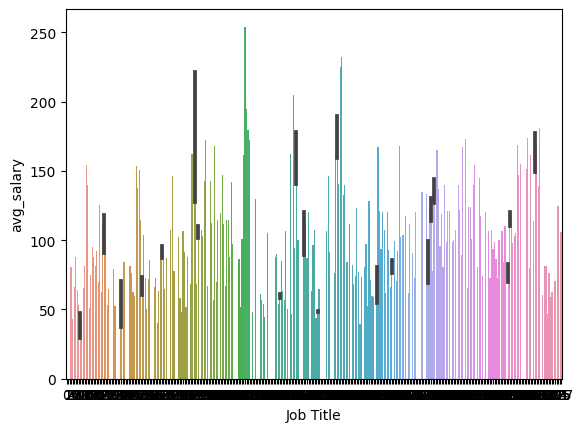

In [ ]:
sns.barplot(data=df2,x='Job Title',y='avg_salary')

<Axes: >

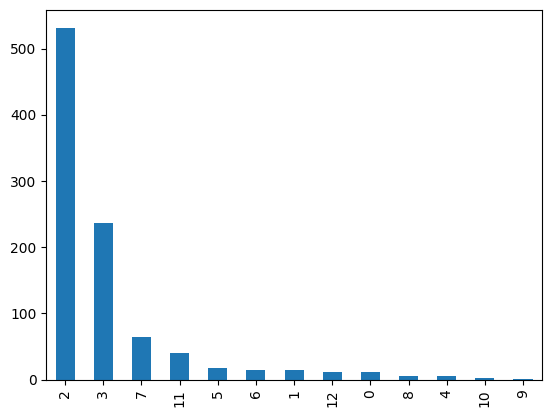

In [ ]:
df2['Type of ownership'].value_counts().plot.bar()

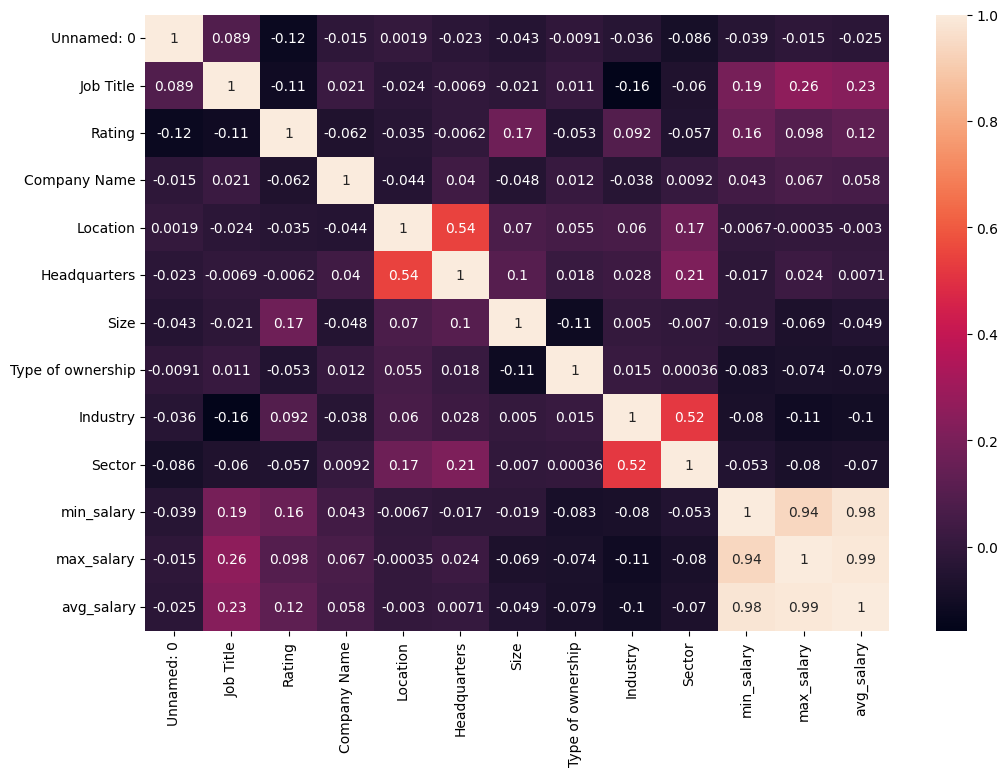

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [ ]:
df2['avg_salary']=df2['avg_salary'].fillna(df2['avg_salary'].mode()[0])

In [ ]:
x=df2.loc[:,'Job Title':'Sector']
y=df2['avg_salary']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
"""smote=SMOTE(sampling_strategy='auto',random_state=100)
x,y=smote.fit_resample(x,y)"""

"smote=SMOTE(sampling_strategy='auto',random_state=100)\nx,y=smote.fit_resample(x,y)"

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
ss=StandardScaler()

In [ ]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)
import pickle
pickle.dump(ss,open('ss1.pkl','wb'))

In [ ]:
model1=DecisionTreeRegressor(criterion='absolute_error',random_state=100)
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
pred1

array([ 72. , 125. , 100.5, 120. , 114.5,  48.5,  73. ,  98.5, 164. ,
       133. ,  76.5,  87. ,  96. ,  91.5,  87.5, 128. , 161.5, 112.5,
        90. ,  95. ,  66.5,  47. ,  71.5,  87.5,  90.5, 147.5,  52.5,
        84. , 125. ,  87.5,  80.5,  87.5, 205. , 110.5,  68.5, 114.5,
        72.5, 120.5, 111.5, 124.5,  39.5,  87.5, 124.5,  87.5, 164.5,
        77.5,  84.5,  69. , 140.5,  96. ,  81. , 121. ,  75.5, 107. ,
        67. , 154.5,  29.5,  81. , 155. ,  87.5,  75.5,  97.5,  87.5,
        87.5,  87.5, 108. , 106.5,  76. , 143. ,  87.5,  86. , 146. ,
       109. ,  87.5,  87.5, 140. ,  87.5,  88. ,  87.5,  99. , 107.5,
       120.5, 161.5, 154.5,  76.5, 119.5, 106.5,  87.5, 120. , 107.5,
        87.5,  87.5,  66.5, 113.5, 124. ,  70.5, 140. ,  87.5,  87.5,
        84.5, 121. , 110.5, 143. , 104.5, 104.5,  87.5, 119.5, 100. ,
       120.5, 154.5, 173. , 121. ,  87.5,  87.5,  87.5,  68.5, 116.5,
       148. ,  62. , 118.5,  48.5,  99.5,  39.5,  74.5,  87.5, 225. ,
        87.5, 124.5,

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,mean_absolute_error

print(mean_squared_error(y_test,pred1))
print(mean_absolute_error(y_test,pred1))

1406.58984375
25.4765625


In [ ]:
model2=KNeighborsRegressor(n_neighbors=10)
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
pred2

array([ 84.95, 103.25, 119.95, 105.95, 149.2 , 110.15, 116.5 , 120.7 ,
       107.75, 112.1 ,  83.55, 105.9 ,  92.45, 104.55,  88.7 , 128.85,
       105.25, 104.15,  81.8 ,  89.6 ,  84.95, 102.15,  77.25, 132.3 ,
        95.25, 107.75,  88.8 ,  97.1 ,  79.75, 119.5 ,  94.6 , 110.25,
       132.85, 107.2 , 122.65, 105.25, 102.8 ,  92.95,  78.  , 127.55,
       100.7 , 149.55, 168.55, 108.55, 113.95,  98.55,  86.  , 108.  ,
        92.05, 132.3 ,  92.05, 125.  ,  83.05,  84.95,  85.15, 116.1 ,
       100.75,  92.05,  84.3 , 101.55,  83.05, 112.  , 126.35,  87.95,
        89.05, 102.65, 104.3 , 125.4 , 102.2 ,  89.35,  93.65, 107.55,
        92.15, 111.35, 102.85, 119.45,  75.5 ,  87.5 ,  90.85,  92.3 ,
        90.45,  98.6 , 105.25, 130.85,  97.8 , 153.6 , 104.3 ,  95.75,
       115.2 ,  97.5 , 105.65, 104.55, 122.  , 102.8 , 114.5 ,  90.1 ,
       119.45, 109.85,  80.8 ,  84.6 , 103.25, 147.  ,  95.55, 104.3 ,
        82.75,  84.95, 153.6 , 110.05,  87.9 , 116.1 , 114.15,  68.9 ,
      

In [ ]:
print(mean_squared_error(y_test,pred2))
print(mean_absolute_error(y_test,pred2))

1151.0640494791667
24.923697916666665


In [ ]:
model3=SVR()
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)

In [ ]:
print(mean_squared_error(y_test,pred3))
print(mean_absolute_error(y_test,pred3))

1064.141235530935
22.319907974727442


In [ ]:
model4=Lasso(alpha=0.1)
model4.fit(x_train,y_train)
pred4=model4.predict(x_test)

In [ ]:
print(mean_squared_error(y_test,pred4))
print(mean_absolute_error(y_test,pred4))

1007.8676057984479
23.41278714223314


In [ ]:
model5=Ridge(alpha=0.5)
model5.fit(x_train,y_train)
pred5=model5.predict(x_test)

In [ ]:
print(mean_squared_error(y_test,pred5))
print(mean_absolute_error(y_test,pred5))

1008.0798553137114
23.390896032367902


In [ ]:
model6=XGBRegressor()
model6.fit(x_train,y_train)
pred6=model6.predict(x_test)

In [ ]:
print(mean_squared_error(y_test,pred6))
print(mean_absolute_error(y_test,pred6))

744.1454079768524
19.736667295296986


In [ ]:
model7=RandomForestRegressor(random_state=100)
model7.fit(x_train,y_train)
pred7=model7.predict(x_test)

In [ ]:
print(mean_squared_error(y_test,pred7))
print(mean_absolute_error(y_test,pred7))

608.8435147135417
17.494088541666667


In [ ]:
pickle.dump(model7,open('RandomForestRegressor','wb'))

In [ ]:
pickle.dump(le1,open('le1','wb'))
pickle.dump(le1,open('le2','wb'))
pickle.dump(le1,open('le3','wb'))
pickle.dump(le1,open('le4','wb'))
pickle.dump(le1,open('le5','wb'))
pickle.dump(le1,open('le6','wb'))
pickle.dump(le1,open('le7','wb'))
pickle.dump(le1,open('le8','wb'))

In [ ]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
job_unique=df['Job Title'].unique()
print(job_unique)
import json
file_name="job_unique.json"
unique_job_list = job_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_job_list, json_file)

['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst' 'Data Engineer I'
 'Scientist I/II, Biology' 'Customer Data Scientist'
 'Data Scientist - Health Data Analytics'
 'Senior Data Scientist / Machine Learning'
 'Data Scientist - Quantitative' 'Digital Health Data Scientist'
 'Associate Data Analyst' 'Clinical Data Scientist'
 'Data Scientist / Machine Learning Expert' 'Web Data Analyst'
 'Senior Data Scientist' 'Data Engineer'
 'Data Scientist - Algorithms & Inference' 'Scientist'
 'Data Science Analyst' 'Lead Data Scientist'
 'Spectral Scientist/Engineer'
 'College Hire - Data Scientist - Open to December 2019 Graduates'
 'Data Scientist, Office of Data Science' 'Business Intelligence Analyst'
 'Senior Risk Data Scientist'
 'Data Scientist in Artificial Intelligence Early Career'
 'Data Scientist - Research' 'R&D Data Analysis Scientist'
 'Analytics Consultant' 'Director, Data Science' 'Data Scientist SR'
 'R&D Sr Data 

In [4]:
comp_unique=df['Company Name'].unique()
print(comp_unique)
import json
file_name="comp_unique.json"
unique_comp_list = comp_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_comp_list, json_file)

['Tecolote Research\n3.8' 'University of Maryland Medical System\n3.4'
 'KnowBe4\n4.8' 'PNNL\n3.8' 'Affinity Solutions\n2.9' 'CyrusOne\n3.4'
 'ClearOne Advantage\n4.1' 'Logic20/20\n3.8'
 'Rochester Regional Health\n3.3' '<intent>\n4.6' 'Wish\n3.5'
 'ManTech\n4.1' 'Walmart\n3.2' 'Yesler\n4.1' 'Takeda Pharmaceuticals\n3.7'
 'Audible\n3.6' 'Blueprint Medicines\n3.9' 'h2o.ai\n4.3' 'Nuna\n4.2'
 'Pinnacol Assurance\n4.0' 'Porch\n3.2' 'Health IQ\n3.9'
 'Truckstop.com\n3.8' 'SMC 3\n4.3' 'Mars\n3.9' 'Novetta\n4.0'
 'Pfizer\n4.0' 'First Tech Federal Credit Union\n3.5'
 'The Hanover Insurance Group\n3.7' 'Amrock\n3.6' 'Novartis\n3.8'
 'Juniper Networks\n3.8' 'New England Biolabs\n4.7'
 'Clarity Insights\n4.2' 'Esri\n3.5' 'Systems & Technology Research\n4.7'
 'Sartorius\n3.5' 'Lancer Insurance\n3.5' 'Sauce Labs\n4.2' 'Amount\n4.1'
 'Persivia\n3.6' 'Edgewell Personal Care\n3.4' 'Equity Residential\n4.3'
 'Brightside\n5.0' 'BPA Services\n5.0' 'Visa Inc.\n3.7' 'Intrado\n3.1'
 'Centauri\n4.7' 'Caterpi

In [5]:
loc_unique=df['Location'].unique()
print(loc_unique)
import json
file_name="loc_unique.json"
unique_loc_list = loc_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_loc_list, json_file)

['Albuquerque, NM' 'Linthicum, MD' 'Clearwater, FL' 'Richland, WA'
 'New York, NY' 'Dallas, TX' 'Baltimore, MD' 'San Jose, CA'
 'Rochester, NY' 'Chantilly, VA' 'Plano, TX' 'Seattle, WA' 'Cambridge, MA'
 'Newark, NJ' 'Mountain View, CA' 'San Francisco, CA' 'Denver, CO'
 'Chicago, IL' 'Louisville, KY' 'Oregon' 'Herndon, VA' 'Hillsboro, OR'
 'Worcester, MA' 'Groton, CT' 'Detroit, MI' 'Sunnyvale, CA' 'Ipswich, MA'
 'Redlands, CA' 'Woburn, MA' 'Fremont, CA' 'Long Beach, NY'
 'Marlborough, MA' 'Allendale, NJ' 'Chandler, AZ' 'Washington, DC'
 'Bellevue, WA' 'Longmont, CO' 'Beavercreek, OH' 'Peoria, IL'
 'Kingdom, IL' 'Fort Lauderdale, FL' 'Boston, MA' 'Huntsville, AL'
 'Armonk, NY' 'San Diego, CA' 'Saint Louis, MO' 'Lincoln, RI'
 'Cincinnati, OH' 'Palo Alto, CA' 'Coraopolis, PA' 'Framingham, MA'
 'Atlanta, GA' 'New Jersey' 'Philadelphia, PA' 'Vancouver, WA'
 'Indianapolis, IN' 'Lake Forest, IL' 'Maryland Heights, MO'
 'Charlottesville, VA' 'Pittsburgh, PA' 'Harrisburg, PA' 'Laurel, MD'
 'Arli

In [7]:
head_unique=df['Headquarters'].unique()
print(head_unique)
import json
file_name="head_unique.json"
unique_head_list = head_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_head_list, json_file)

['Goleta, CA' 'Baltimore, MD' 'Clearwater, FL' 'Richland, WA'
 'New York, NY' 'Dallas, TX' 'Seattle, WA' 'Rochester, NY'
 'San Francisco, CA' 'Herndon, VA' 'Bentonville, AR' 'OSAKA, Japan'
 'Newark, NJ' 'Cambridge, MA' 'Mountain View, CA' 'Denver, CO'
 'New Plymouth, ID' 'Peachtree City, GA' 'Mc Lean, VA' 'San Jose, CA'
 'Worcester, MA' 'Detroit, MI' 'Basel, Switzerland' 'Sunnyvale, CA'
 'Ipswich, MA' 'Chicago, IL' 'Redlands, CA' 'Woburn, MA'
 'Gottingen, Germany' 'Long Beach, NY' 'Lowell, MA' 'Shelton, CT'
 'Alexandria, VA' 'Foster City, CA' 'Omaha, NE' 'Chantilly, VA'
 'Deerfield, IL' 'London, United Kingdom' 'Fort Lauderdale, FL'
 'Boston, MA' 'Huntsville, AL' 'Zurich, Switzerland' 'Falls Church, VA'
 'Santa Clara, CA' 'Saint Louis, MO' 'Lincoln, RI' 'Cincinnati, OH'
 'Palo Alto, CA' 'Coraopolis, PA' 'Framingham, MA' 'Atlanta, GA'
 'Holmdel, NJ' 'Chadds Ford, PA' 'Pleasanton, CA' 'Lake Forest, IL'
 'San Diego, CA' 'Reston, VA' 'Louvain-la-Neuve, Belgium' 'Beijing, China'
 'Harrisbur

In [8]:
size_unique=df['Size'].unique()
print(size_unique)
import json
file_name="size_unique.json"
unique_size_list = size_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_size_list, json_file)

['501 to 1000 employees' '10000+ employees' '1001 to 5000 employees'
 '51 to 200 employees' '201 to 500 employees' '5001 to 10000 employees'
 '1 to 50 employees' 'Unknown' '-1']


In [9]:
type_unique=df['Type of ownership'].unique()
print(type_unique)
import json
file_name="type_unique.json"
unique_type_list = type_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_type_list, json_file)

['Company - Private' 'Other Organization' 'Government' 'Company - Public'
 'Hospital' 'Subsidiary or Business Segment' 'Nonprofit Organization'
 'Contract' 'Unknown' 'College / University' 'Private Practice / Firm'
 '-1' 'School / School District']


In [10]:
ind_unique=df['Industry'].unique()
print(ind_unique)
import json
file_name="ind_unique.json"
unique_ind_list = ind_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_ind_list, json_file)

['Aerospace & Defense' 'Health Care Services & Hospitals'
 'Security Services' 'Energy' 'Advertising & Marketing' 'Real Estate'
 'Banks & Credit Unions' 'Consulting' 'Internet' 'Other Retail Stores'
 'Research & Development' 'Department, Clothing, & Shoe Stores'
 'Biotech & Pharmaceuticals' 'Motion Picture Production & Distribution'
 'Enterprise Software & Network Solutions' 'Insurance Carriers'
 'Insurance Agencies & Brokerages' 'Logistics & Supply Chain'
 'Food & Beverage Manufacturing' 'Telecommunications Services'
 'IT Services' 'Computer Hardware & Software' '-1'
 'Consumer Products Manufacturing' 'Investment Banking & Asset Management'
 'Industrial Manufacturing' 'Staffing & Outsourcing' 'Metals Brokers'
 'Financial Transaction Processing' 'Sporting Goods Stores' 'Wholesale'
 'Mining' 'Financial Analytics & Research' 'Federal Agencies'
 'Education Training Services' 'Transportation Equipment Manufacturing'
 'Farm Support Services' 'Preschool & Child Care'
 'TV Broadcast & Cable N

In [3]:
sec_unique=df['Sector'].unique()
print(sec_unique)
import json
file_name="sec_unique.json"
unique_sec_list = sec_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_sec_list, json_file)

['Aerospace & Defense' 'Health Care' 'Business Services'
 'Oil, Gas, Energy & Utilities' 'Real Estate' 'Finance'
 'Information Technology' 'Retail' 'Biotech & Pharmaceuticals' 'Media'
 'Insurance' 'Transportation & Logistics' 'Manufacturing'
 'Telecommunications' '-1' 'Mining & Metals' 'Government' 'Education'
 'Agriculture & Forestry' 'Travel & Tourism' 'Non-Profit'
 'Arts, Entertainment & Recreation' 'Construction, Repair & Maintenance'
 'Accounting & Legal' 'Consumer Services']
